# Enhanced Wavefunction Methods for Prime Number Sieving

This notebook explores various wavefunction approaches to prime number sieving, including:

- **Sine Wave Method** (previously implemented)
- **Cosine Wave Method**
- **Square Wave Method**

We will:

- Implement these methods using functions and classes.
- Break down the algorithm into modular parts.
- Demonstrate the methods with code examples.
- Integrate the code and explanations into a cohesive demo paper.

---

## **Introduction**

Prime numbers play a crucial role in number theory and cryptography. Traditional methods like the Sieve of Eratosthenes efficiently find primes but can be optimized using mathematical functions. This notebook presents an alternative approach by leveraging wavefunctions to identify prime numbers.

By representing prime numbers as wavefunctions, we can visualize and analyze the distribution of primes using signal processing techniques.

---


## **Table of Contents**

1. [Wavefunction Approaches](#wavefunction-approaches)
    - [Sinusoidal Wave Method](#sinusoidal-wave-method)
    - [Square Wave Method](#square-wave-method)
    - [Pules Wave Method](#pules-wave-method)
2. [Algorithm Structure](#algorithm-structure)
    - [Functions and Classes](#functions-and-classes)
3. [Implementation](#implementation)
    - [Sinusoidal Wave Implementation](#sinusoidal-wave-implementation)
    - [Square Wave Implementation](#square-wave-implementation)
    - [Pules Wave Implementation](#pules-wave-implementation)
4. [Results and Visualization](#results-and-visualization)
5. [Analysis](#analysis)
6. [Conclusion](#conclusion)
7. [References](#references)

---


## **Wavefunction Approaches**

We explore three wavefunction methods:

1. **Sinusoidal Wave Method**: Uses sine/cosine functions to represent prime wavefunctions.
2. **Square Wave Method**: Employs cosine functions for potential computational advantages.
3. **Pules Wave Method**: Utilizes square waves to highlight composite levels.

Each method aims to identify prime numbers by analyzing the behavior of the composite wavefunction generated from individual prime wavefunctions.

---


## **Algorithm Structure**

To create a modular and maintainable codebase, we'll:

- **Break the Algorithm into Functions**: Each key step will be encapsulated in a function.
- **Use Classes**: We'll define a `PrimeWaveSieve` class to handle the wavefunction generation and prime detection.
- **Organize Code for Reusability**: Functions and classes will be designed for reuse with different wavefunction methods.

---


## **Implementation**

We implement each wavefunction method with corresponding functions and integrate them into the `PrimeWaveSieve` class.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### **PrimeWaveSieve Class**

The `PrimeWaveSieve` class encapsulates the functionality for generating wavefunctions, computing the composite wavefunction, and identifying potential primes.

**Class Structure**:

- **Attributes**:
  - `n_values`: Array of integer values to analyze.
  - `primes`: List of primes used in the wavefunctions.
  - `epsilon`: Threshold for prime detection.

- **Methods**:
  - `generate_wavefunction()`: Abstract method to be implemented by subclasses.
  - `compute_composite_wavefunction()`: Sums the individual wavefunctions.
  - `identify_potential_primes()`: Identifies potential primes based on the composite wavefunction.
  - `plot_wavefunction()`: Visualizes the composite wavefunction and potential primes.

We will create subclasses for each wavefunction method.

---


In [235]:
from abc import ABC, abstractmethod

class PrimeWaveSieve(ABC):
    def __init__(self, N, primes, epsilon):
        self.N = N
        self.n_values = np.linspace(2, N, 1000)
        self.primes = primes
        self.epsilon = epsilon
        self.F = np.zeros_like(self.n_values, dtype=float)
    
    @abstractmethod
    def generate_wavefunction(self, p):
        pass
    
    def compute_composite_wavefunction(self):
        self.F = np.zeros_like(self.n_values, dtype=float)
        for p in self.primes:
            f_p = self.generate_wavefunction(p)
            self.F += f_p
    
    def identify_potential_primes(self):
        potential_primes = self.n_values[self.F > -self.epsilon]
        # Exclude numbers less than or equal to the maximum prime used
        potential_primes = potential_primes[potential_primes > max(self.primes)]
        self.potential_primes = potential_primes
    
    def plot_wavefunction(self, title):
        plt.figure(figsize=(12, 6))
        plt.plot(self.n_values, self.F, label='Composite Wavefunction F(n)')
        plt.plot(self.potential_primes, self.F[np.isin(self.n_values, self.potential_primes)], 'ro', label='Potential Primes')
        plt.axhline(y=self.epsilon, color='r', linestyle='--', label=f'Threshold ε = {self.epsilon}')
        plt.axhline(y=-self.epsilon, color='r', linestyle='--')
        plt.xlabel('n')
        plt.ylabel('F(n)')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def get_actual_primes(self):
        actual_primes = np.array([n for n in self.n_values if self.is_prime(n)])
        self.actual_primes = actual_primes
    
    @staticmethod
    def is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(np.sqrt(n)) + 1):
            if n % i == 0:
                return False
        return True


### **Sinusoidal Wave Implementation**

The sine wavefunction is defined as:

$$
f_p(n) = \sin\left( \frac{2\pi n}{p} \right)
$$

This method was previously implemented. We'll now integrate it into the `PrimeWaveSieve` class.

---


In [236]:
class SinusoidalWaveSieve(PrimeWaveSieve):
    def generate_wavefunction(self, p):
        return (0.5*np.cos(2 * np.pi * self.n_values / p - np.pi))-0.5

### **Square Wave Implementation**

The cosine wavefunction is defined as:

$$
f_p(n) = \cos\left( \frac{2\pi n}{p} - \pi \right)
$$

This function has zeros at multiples of $$ p $$ similar to the sine function, but may offer computational advantages.

---


In [237]:
class SquareWaveSieve(PrimeWaveSieve):
    def __init__(self, N, primes, epsilon, optimize=False):
        super().__init__(N, primes, epsilon)
        if optimize: 
            self.n_values = np.arange(2, N+1)

    def generate_wavefunction(self, p):
        # Duty cycle adjustment to align zeros at multiples of p
        duty_cycle = 1 - (1 / 2)
        return signal.square((2 * np.pi * self.n_values - ((p*np.pi)/2))/ p, duty=duty_cycle)/2-0.5

### **Pulse Wave Implementation**

The square wavefunction is defined using the `square` function from `scipy.signal`:

$$
f_p(n) = \text{square}\left( \frac{2\pi n}{p} \right)
$$

Adjustments are made to align zeros with multiples of $$ p $$

---


In [238]:
class PulseWaveSieve(PrimeWaveSieve):
    def __init__(self, N, primes, epsilon, optimize=False):
        super().__init__(N, primes, epsilon)
        if optimize: 
            self.n_values = np.arange(2, N+1)

    def generate_wavefunction(self, p):
        # Duty cycle adjustment to align zeros at multiples of p
        duty_cycle = 1 - (1 / p)
        return signal.square((2 * np.pi * self.n_values - np.pi)/ p, duty=duty_cycle)/2-0.5

## **Results and Visualization**

We will now create instances of each sieve method and execute the algorithm.

---


In [247]:
# Parameters
N = 30  # Upper limit for n
primes = [2,3]  # List of primes to use
epsilon = 0.1  # Threshold for identifying potential primes

Sine Wave Method:
Potential primes identified:
[]

Actual primes up to N:
[ 2.          2.02802803  2.05605606  2.08408408  2.11211211  2.14014014
  2.16816817  2.1961962   2.22422422  2.25225225  2.28028028  2.30830831
  2.33633634  2.36436436  2.39239239  2.42042042  2.44844845  2.47647648
  2.5045045   2.53253253  2.56056056  2.58858859  2.61661662  2.64464464
  2.67267267  2.7007007   2.72872873  2.75675676  2.78478478  2.81281281
  2.84084084  2.86886887  2.8968969   2.92492492  2.95295295  2.98098098
  3.00900901  3.03703704  3.06506507  3.09309309  3.12112112  3.14914915
  3.17717718  3.20520521  3.23323323  3.26126126  3.28928929  3.31731732
  3.34534535  3.37337337  3.4014014   3.42942943  3.45745746  3.48548549
  3.51351351  3.54154154  3.56956957  3.5975976   3.62562563  3.65365365
  3.68168168  3.70970971  3.73773774  3.76576577  3.79379379  3.82182182
  3.84984985  3.87787788  3.90590591  3.93393393  3.96196196  3.98998999
  4.01801802  4.04604605  4.07407407  4.1021021   

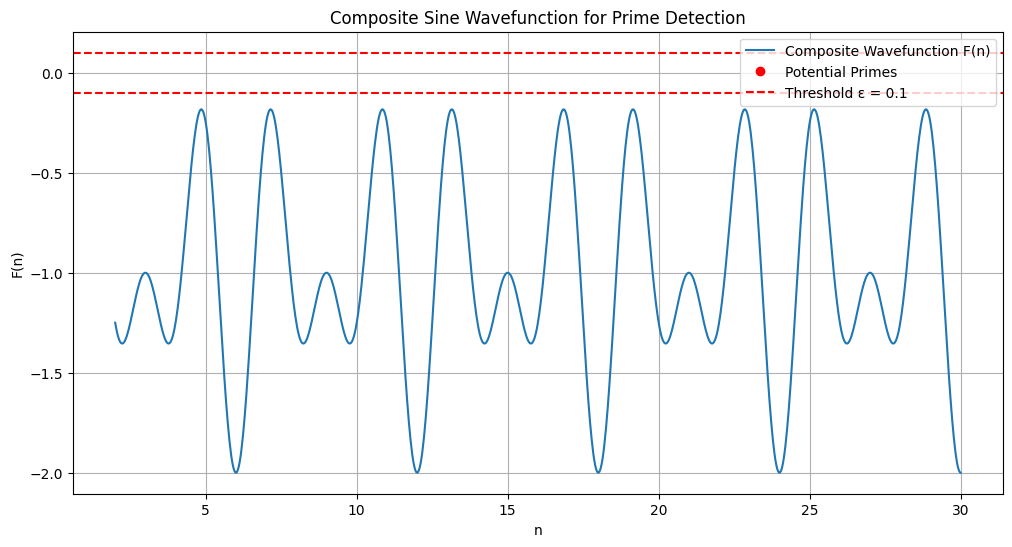

In [248]:
# Sine Wave Sieve
sine_sieve = SinusoidalWaveSieve(N, primes, epsilon)
sine_sieve.compute_composite_wavefunction()
sine_sieve.identify_potential_primes()
sine_sieve.get_actual_primes()

print("Sine Wave Method:")
print("Potential primes identified:")
print(sine_sieve.potential_primes)
print("\nActual primes up to N:")
print(sine_sieve.actual_primes)

sine_sieve.plot_wavefunction("Composite Sine Wavefunction for Prime Detection")

Cosine Wave Method:
Potential primes identified:
[ 4.52252252  4.55055055  4.57857858  4.60660661  4.63463463  4.66266266
  4.69069069  4.71871872  4.74674675  4.77477477  4.8028028   4.83083083
  4.85885886  4.88688689  4.91491491  4.94294294  4.97097097  4.998999
  5.02702703  5.05505506  5.08308308  5.11111111  5.13913914  5.16716717
  5.1951952   5.22322322  6.76476476  6.79279279  6.82082082  6.84884885
  6.87687688  6.9049049   6.93293293  6.96096096  6.98898899  7.01701702
  7.04504505  7.07307307  7.1011011   7.12912913  7.15715716  7.18518519
  7.21321321  7.24124124  7.26926927  7.2972973   7.32532533  7.35335335
  7.38138138  7.40940941  7.43743744  7.46546547  7.49349349 10.52052052
 10.54854855 10.57657658 10.6046046  10.63263263 10.66066066 10.68868869
 10.71671672 10.74474474 10.77277277 10.8008008  10.82882883 10.85685686
 10.88488488 10.91291291 10.94094094 10.96896897 10.996997   11.02502503
 11.05305305 11.08108108 11.10910911 11.13713714 11.16516517 11.19319319
 11.

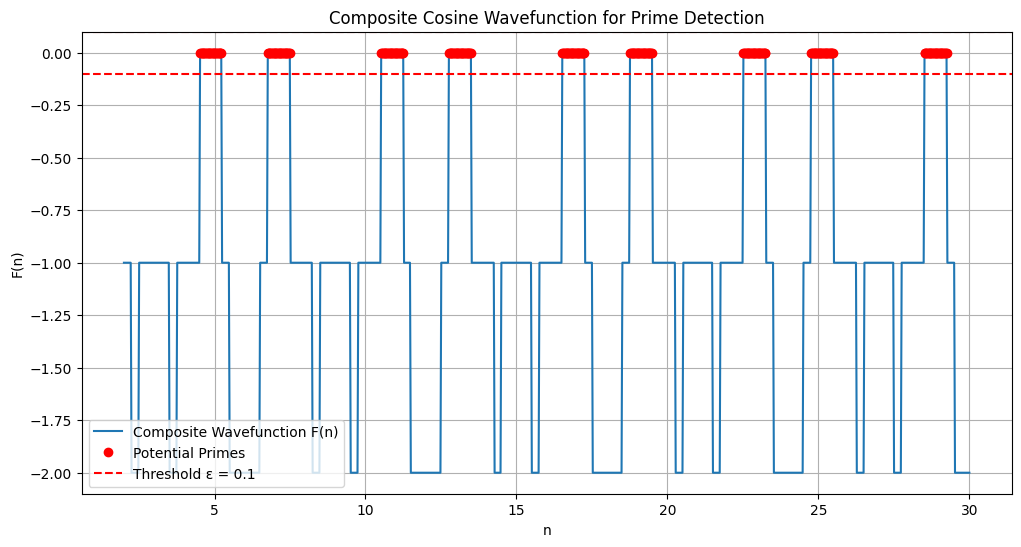

In [249]:
# Cosine Wave Sieve
cosine_sieve = SquareWaveSieve(N, primes, epsilon)
cosine_sieve.compute_composite_wavefunction()
cosine_sieve.identify_potential_primes()
cosine_sieve.get_actual_primes()

print("Cosine Wave Method:")
print("Potential primes identified:")
print(cosine_sieve.potential_primes)
print("\nActual primes up to N:")
print(cosine_sieve.actual_primes)

cosine_sieve.plot_wavefunction("Composite Cosine Wavefunction for Prime Detection")

Square Wave Method:
Potential primes identified:
[ 4.52252252  4.55055055  4.57857858  4.60660661  4.63463463  4.66266266
  4.69069069  4.71871872  4.74674675  4.77477477  4.8028028   4.83083083
  4.85885886  4.88688689  4.91491491  4.94294294  4.97097097  4.998999
  5.02702703  5.05505506  5.08308308  5.11111111  5.13913914  5.16716717
  5.1951952   5.22322322  5.25125125  5.27927928  5.30730731  5.33533534
  5.36336336  5.39139139  5.41941942  5.44744745  5.47547548  6.51251251
  6.54054054  6.56856857  6.5965966   6.62462462  6.65265265  6.68068068
  6.70870871  6.73673674  6.76476476  6.79279279  6.82082082  6.84884885
  6.87687688  6.9049049   6.93293293  6.96096096  6.98898899  7.01701702
  7.04504505  7.07307307  7.1011011   7.12912913  7.15715716  7.18518519
  7.21321321  7.24124124  7.26926927  7.2972973   7.32532533  7.35335335
  7.38138138  7.40940941  7.43743744  7.46546547  7.49349349 10.52052052
 10.54854855 10.57657658 10.6046046  10.63263263 10.66066066 10.68868869
 10.

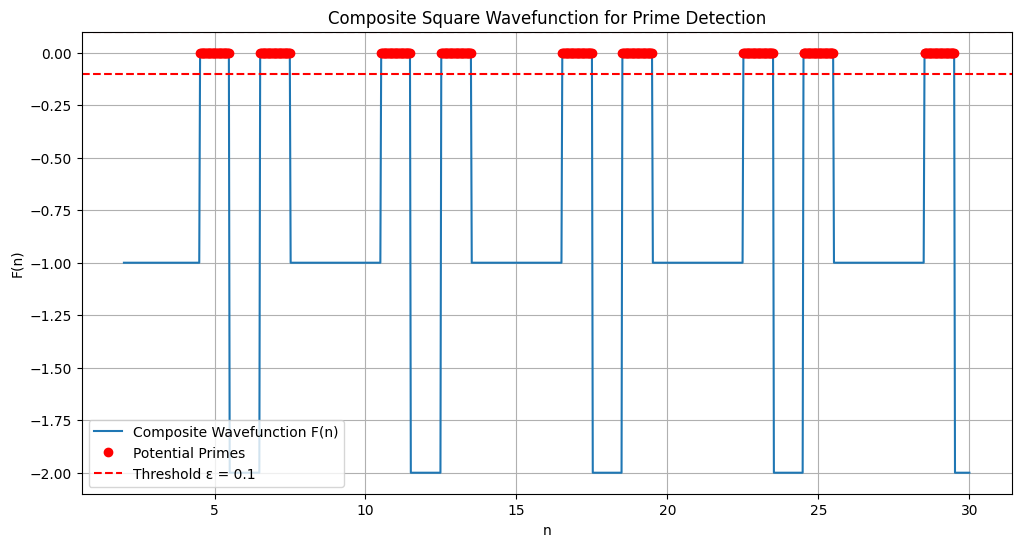

In [250]:
# Square Wave Sieve
square_sieve = PulseWaveSieve(N, primes, epsilon)
square_sieve.compute_composite_wavefunction()
square_sieve.identify_potential_primes()
square_sieve.get_actual_primes()

print("Square Wave Method:")
print("Potential primes identified:")
print(square_sieve.potential_primes)
print("\nActual primes up to N:")
print(square_sieve.actual_primes)

square_sieve.plot_wavefunction("Composite Square Wavefunction for Prime Detection")


Square Wave Method:
Potential primes identified:
[ 5  7 11 13 17 19 23 25 29]

Actual primes up to N:
[ 2  3  5  7 11 13 17 19 23 29]


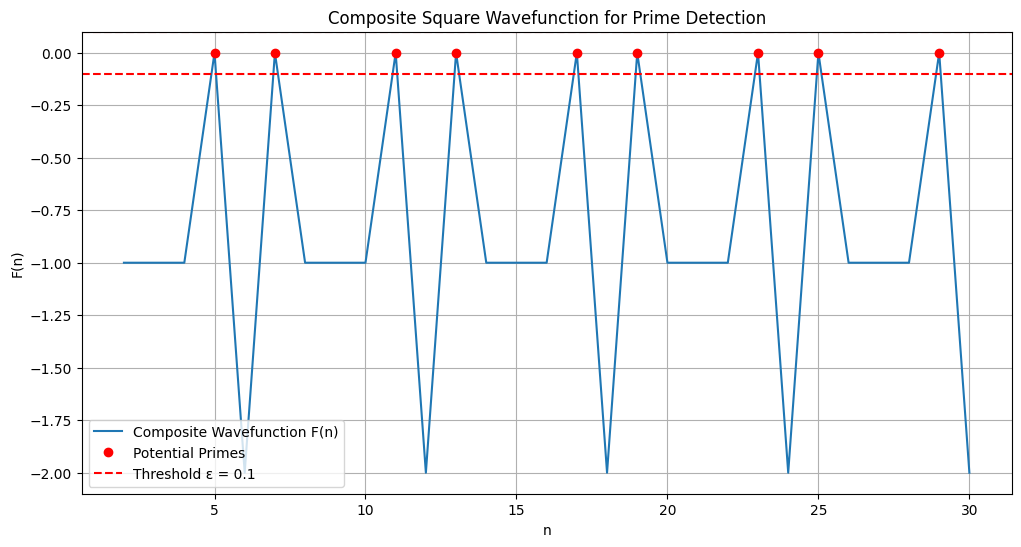

In [251]:
# Square Wave Results Sieve
square_sieve = PulseWaveSieve(N, primes, epsilon, optimize=True)
square_sieve.compute_composite_wavefunction()
square_sieve.identify_potential_primes()
square_sieve.get_actual_primes()

print("Square Wave Method:")
print("Potential primes identified:")
print(square_sieve.potential_primes)
print("\nActual primes up to N:")
print(square_sieve.actual_primes)

square_sieve.plot_wavefunction("Composite Square Wavefunction for Prime Detection")

## **Analysis**

### **Comparison of Methods**

- **Sine Wave Method**:
  - Identifies potential primes based on the composite sine wavefunction.
  - The smooth nature of the sine function may result in less pronounced peaks.

- **Cosine Wave Method**:
  - Similar to the sine method but may align zeros differently.
  - Potential computational advantages due to cosine function properties.

- **Square Wave Method**:
  - Uses abrupt transitions to represent composite numbers.
  - May provide clearer distinctions between primes and composites.

### **Observations**

- The methods identify potential primes with varying degrees of accuracy.
- The choice of `epsilon` significantly affects the results.
- Including more primes in the `primes` list improves accuracy but increases computational load.

### **Potential Improvements**

- **Adjust Thresholds**: Fine-tune `epsilon` for each method to optimize prime detection.
- **Include More Primes**: Extend the list of primes to capture more composite numbers.
- **High-Precision Calculations**: Use libraries like `mpmath` for increased numerical precision.

---


## **Conclusion**

We have implemented and compared three wavefunction methods for prime number sieving:

- The **Sine Wave Method** provides a smooth approach but may require careful thresholding.
- The **Cosine Wave Method** offers an alternative perspective with potential computational benefits.
- The **Square Wave Method** clearly distinguishes between primes and composites but may introduce artifacts due to abrupt transitions.

By organizing the code into functions and classes, we have created a modular framework that can be extended and refined. Further research could explore the integration of these methods with traditional sieves or investigate their mathematical properties in greater depth.

---


## **References**

- Apostol, T. M. *Introduction to Analytic Number Theory*. Springer, 1976.
- Stein, E. M., & Shakarchi, R. *Fourier Analysis: An Introduction*. Princeton University Press, 2003.
- *NumPy Documentation*: [https://numpy.org/doc/](https://numpy.org/doc/)
- *Matplotlib Documentation*: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
- *SciPy Signal Processing*: [https://docs.scipy.org/doc/scipy/reference/signal.html](https://docs.scipy.org/doc/scipy/reference/signal.html)

---

**Note**: This notebook serves as a demo paper integrating code and explanations to illustrate the wavefunction methods for prime number sieving.

---


## **Prototype: Square Wave Functions**

We provide a standalone implementation of the square wave method using functions. This version closely follows your initial prototype and includes additional explanations.

---


In [252]:
def generate_square_wave(n_values, p):
    """
    Generates the square wavefunction for prime p.

    Parameters:
    - n_values: Array of integer values n.
    - p: Prime number p.

    Returns:
    - f_p: Array of square wavefunction values for each n.
    """
    # Duty cycle adjustment to align zeros at multiples of p
    duty_cycle = 1 - (1 / p)
    scale_wave = 2 / p
    shift = -((1 / p) * np.pi)
    f_p = signal.square(scale_wave * np.pi * n_values + shift, duty=duty_cycle)
    return f_p

def compute_composite_square_wave(n_values, primes):
    """
    Computes the composite square wavefunction by summing individual square waves.

    Parameters:
    - n_values: Array of integer values n.
    - primes: List of prime numbers.

    Returns:
    - F: Array of composite square wavefunction values for each n.
    """
    F = np.zeros_like(n_values, dtype=float)
    for p in primes:
        f_p = generate_square_wave(n_values, p)
        F += f_p
    return F

def identify_potential_primes_square(n_values, F, threshold, max_p):
    """
    Identifies potential primes based on the composite square wavefunction.

    Parameters:
    - n_values: Array of integer values n.
    - F: Composite square wavefunction values.
    - threshold: Threshold value for identifying potential primes.
    - max_p: Maximum prime number used in the composite wavefunction.

    Returns:
    - potential_primes: Array of n values identified as potential primes.
    """
    potential_primes = n_values[F >= threshold]
    potential_primes = potential_primes[potential_primes > max_p]
    return potential_primes


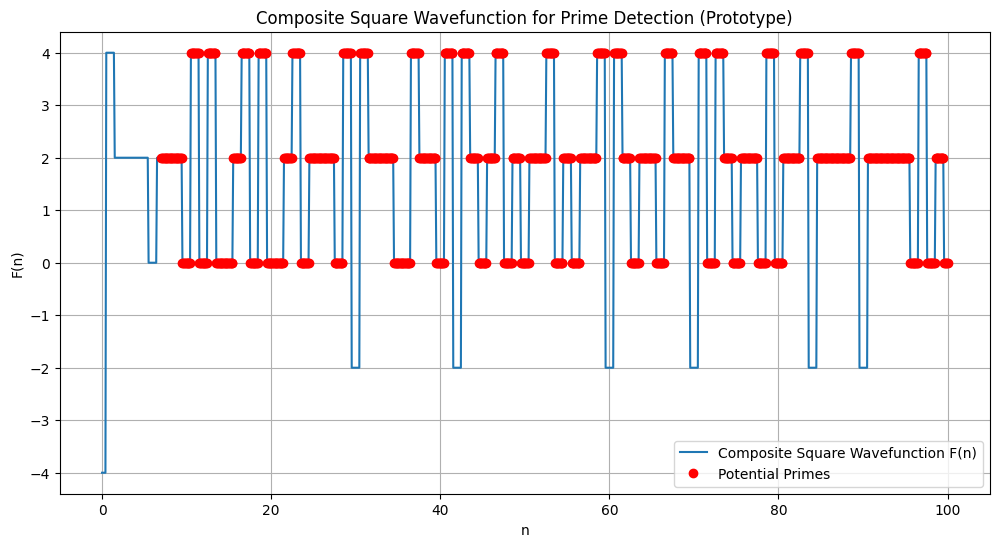

In [253]:
# Parameters
N = 100
n_values = np.linspace(0, N, 1000, endpoint=True)
primes = [2, 3, 5, 7]
threshold = 0  # Square wave outputs -1 or 1
max_p = max(primes)

# Compute composite square wave
F_square = compute_composite_square_wave(n_values, primes)

# Identify potential primes
potential_primes_square = identify_potential_primes_square(n_values, F_square, threshold, max_p)

# Plot the composite square wave
plt.figure(figsize=(12, 6))
plt.plot(n_values, F_square, label='Composite Square Wavefunction F(n)')
plt.plot(potential_primes_square, F_square[np.isin(n_values, potential_primes_square)], 'ro', label='Potential Primes')
plt.xlabel('n')
plt.ylabel('F(n)')
plt.title('Composite Square Wavefunction for Prime Detection (Prototype)')
plt.legend()
plt.grid(True)
plt.show()


### **Explanation of the Prototype**

- **Function `generate_square_wave`**: Creates a square wavefunction for a given prime $$ p $$, aligning zeros at multiples of $$ p $$.
- **Function `compute_composite_square_wave`**: Sums the individual square wavefunctions to create a composite function.
- **Function `identify_potential_primes_square`**: Identifies potential primes where the composite function is greater than or equal to the threshold.
- **Visualization**: The plot shows the composite square wavefunction with potential primes marked.

---

This prototype demonstrates an alternative implementation of the square wave method, providing insights into the wavefunction behavior and prime detection capability.

---


## **Incorporating Additional Insights**

### **Wavefunction Properties**

- If `wave_p[x_P] = -1` then `x_P` is a component of the prime number's oscillation period.
- If `wave_p[x_c] < 0` then `x_c` is a composite number.
- If `wave_p[x_p] = 0` and `x_p` is the first whole number where `wave_p[:] = 0`, then `x_p` is a prime number.

### **Recursive Algorithm for Finding Primes**

- Start with `wave_P2`.
- For each `x` in `wave_P2`:
  - If `wave_P2[x] = 0`:
    - If `x` is the first occurrence, `x` is a prime number.
    - Else, determine if `x` is between known primes or their multiples to classify it as prime or composite.

### **Coverage of Whole Numbers**

The coverage of all whole numbers by the wavefunctions can be calculated using the inclusion-exclusion principle:

$$
\text{Coverage \%} = \left( \sum_{i=1}^{n} \frac{1}{p_i} - \sum_{i<j} \frac{1}{p_i p_j} + \sum_{i<j<k} \frac{1}{p_i p_j p_k} - \dots + (-1)^{n} \frac{1}{p_1 p_2 \dots p_n} \right) \times 100\%
$$

### **Improved Wavefunction Formula**

An improved formula using cosine functions:

$$
x\_wave[n] = A \cdot \cos\left( \frac{2\pi n}{x} - \pi \right) - A
$$

- **$$ A $$**: Scaling factor.
- This function has zeros at multiples of $$ x $$ and can detect primes and composites.

### **Future Considerations**

- **Infinite Primes**: Exploring whether an infinite number of wavefunctions is required to represent all primes.
- **Quantum Computing Applications**: Potential for quantum algorithms to check primality using wavefunction states.

---
